In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("CC GENERAL.csv" )

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df = df.dropna(axis=1, how='all') #tamamı boş olan kolonları sildim

In [6]:
threshold = len(df) * 0.6 
df = df.dropna(axis=1, thresh=threshold)# %60ı ve üstü boş olanları sildim

In [7]:
df.shape

(8950, 18)

In [8]:
df = df.dropna()

In [9]:
df.shape

(8636, 18)

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [13]:
column_names = df.columns.tolist()
formatted_column_names = ', '.join(f"'{col}'" for col in column_names)
print(formatted_column_names)

'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'


In [15]:
x=df[[
    
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]]

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
model=KMeans(9)

In [18]:
model=model.fit(x)

In [19]:
tahmin=model.predict(x)

In [20]:
x["cluster"]=tahmin

In [21]:
silhouette_score(x,tahmin)

0.3509765720872474

In [22]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_  
        print("Cluster", i, "score", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [23]:
clust(10)

Cluster 2 score 0.511307654893661
Cluster 3 score 0.4643217675121428
Cluster 4 score 0.4609535496982842
Cluster 5 score 0.4278547028231229
Cluster 6 score 0.3855480592950465
Cluster 7 score 0.3683177607881204
Cluster 8 score 0.3833383533978892
Cluster 9 score 0.3547702726383539
Cluster 10 score 0.3600925260011952


In [24]:
x["cluster"].value_counts()

0    4742
5    1635
1    1029
6     486
2     312
4     275
7      98
8      36
3      23
Name: cluster, dtype: int64

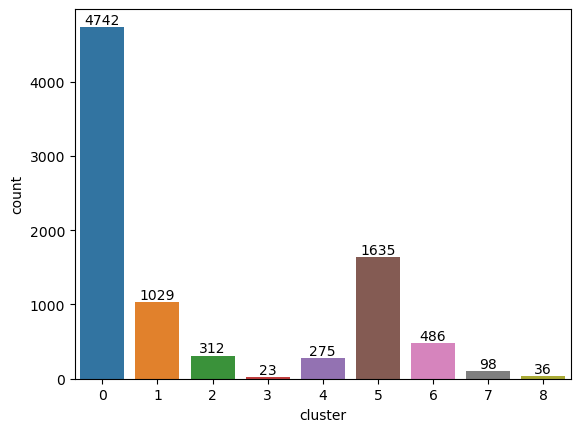

In [25]:
ax=sns.countplot(x=x["cluster"])
ax.bar_label(ax.containers[0]);

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [27]:
link_data=linkage(x,method="ward", metric="euclidean")

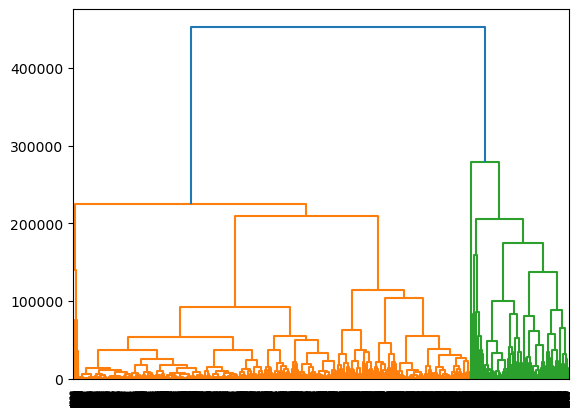

In [28]:
dendrogram(link_data)
plt.show()

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [31]:
labels=model.labels_

In [32]:
from sklearn import metrics

In [33]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[clusters.core_sample_indices_]=True

In [34]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(x,labels))

0.3509765720872474


In [36]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 460.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
from yellowbrick.cluster import KElbowVisualizer

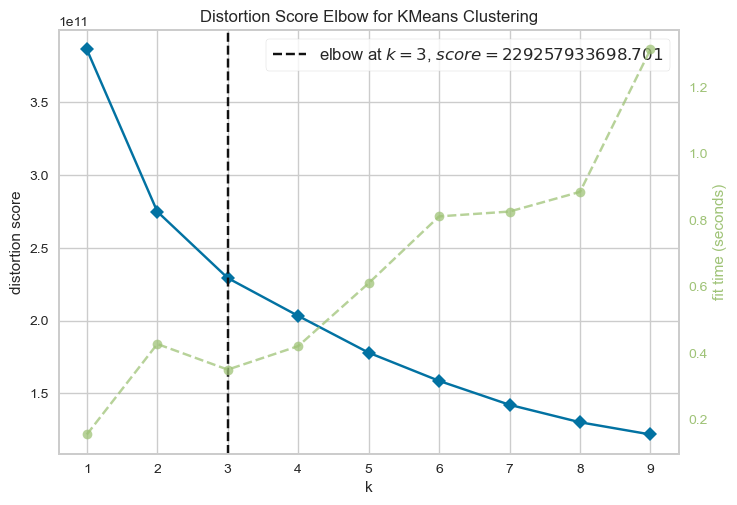

In [38]:
model = KMeans(random_state=42)


visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(x)


visualizer.show()
plt.show()